## ***This script will evaluate the membrane passive propertieis of CRH cells in the BNST between a Sapap3 KO mouse line and a WT line***  
*Written by Omer Richmond*   
*Yizhar Lab*   
*Weizmann institute* 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pyabf
from scipy import signal
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import pandas as pd
from scipy.signal import welch
from functions_for_uri import *
import seaborn as sns

plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.sans-serif'] = ['Calibri']

### *Example of an IV curve*

C:\Users\omerich.WISMAIN\AppData\Local\Temp\ipykernel_18232\2619404943.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap)


Text(0, 0.5, 'Current (pA)')

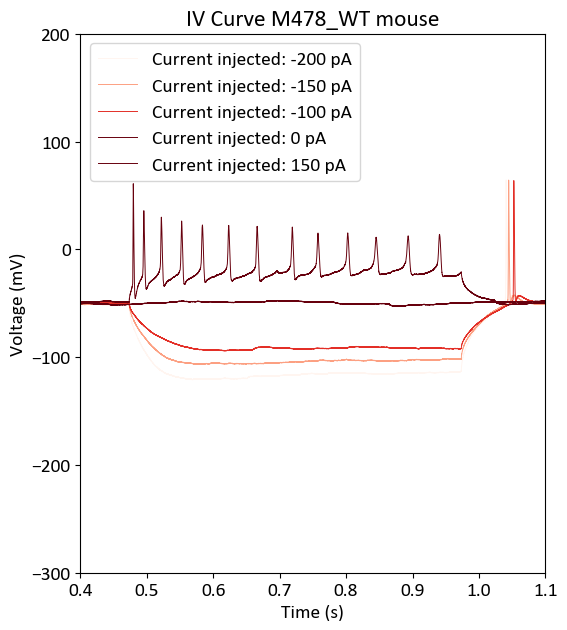

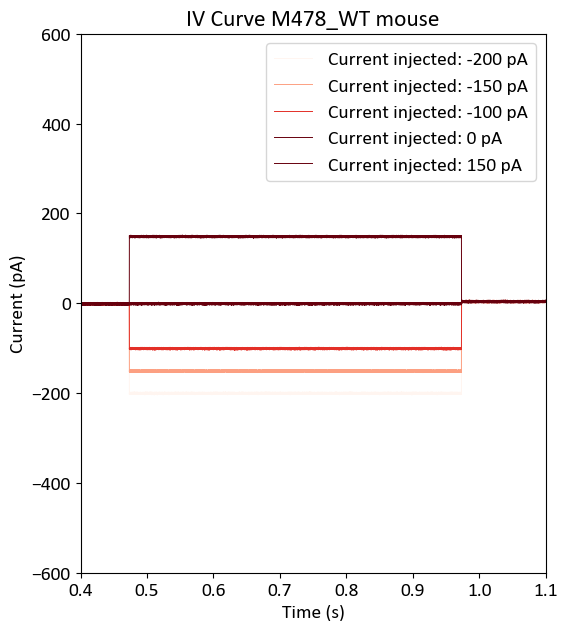

In [2]:
iv_path_wt_mouse = r"""Z:\Omer\Ph.D\Project- Uri's sapap3ko_vs_wt_crh_cells\Data\DATA for analysis\WT\3.8.25\2025_08_03_0000.abf"""
abf = pyabf.ABF(iv_path_wt_mouse)
colormap = 'Reds'  # You can change this to any colormap you prefer
cmap = cm.get_cmap(colormap)
plt.figure(figsize=(6, 7))
plt.title("IV Curve M478_WT mouse")
sweeps_to_plot =[0,1,2,4,7]
for idx, sweep in enumerate(sweeps_to_plot):
    abf.setSweep(sweep)
    plt.plot(abf.sweepX,abf.sweepY,label=f'Current injected: {(-200)+(sweep)*50} pA',color=cmap(idx / (len(sweeps_to_plot)-2)),linewidth=0.7)
plt.legend()
plt.ylim(-300, 200)
plt.xlim(0.4, 1.1)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")

plt.figure(figsize=(6, 7))
plt.title("IV Curve M478_WT mouse")
for idx, sweep in enumerate(sweeps_to_plot):
    abf.setSweep(sweep,1)
    plt.plot(abf.sweepX,abf.sweepY,label=f'Current injected: {(-200)+(sweep)*50} pA',color=cmap(idx / (len(sweeps_to_plot)-2)),linewidth=0.7)
plt.legend()
plt.ylim(-600, 600)
plt.xlim(0.4, 1.1)
plt.xlabel("Time (s)")
plt.ylabel("Current (pA)")

C:\Users\omerich.WISMAIN\AppData\Local\Temp\ipykernel_18232\2748555350.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap)


Text(0, 0.5, 'Current (pA)')

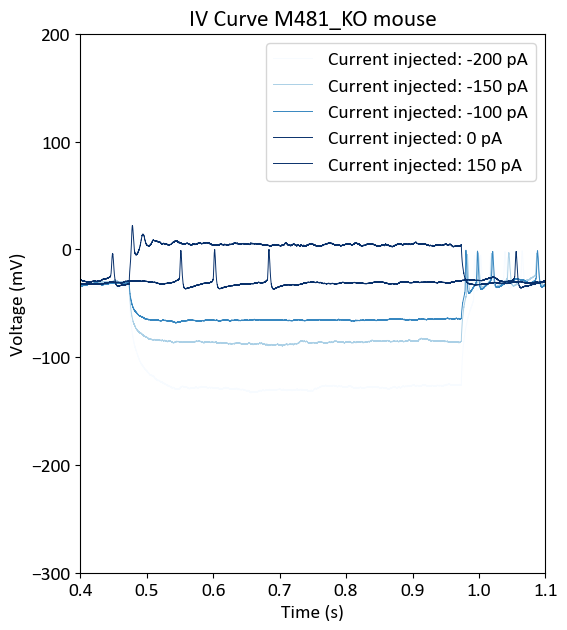

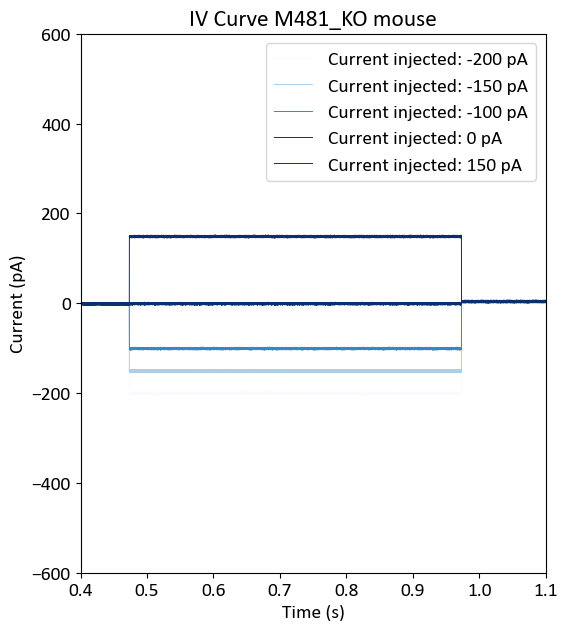

In [3]:
iv_path_ko_mouse = r"""Z:\Omer\Ph.D\Project- Uri's sapap3ko_vs_wt_crh_cells\Data\DATA for analysis\KO\4.8.25\2025_08_04_0003.abf"""
abf = pyabf.ABF(iv_path_ko_mouse)
# Some common matplotlib colormaps include: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'rainbow', 'jet', 'turbo', 'hsv', 'cool', 'hot', 'spring', 'summer', 'autumn', 'winter', 'bone', 'copper', 'pink', 'Wistia', 'twilight', 'twilight_shifted', 'Spectral', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'

colormap = 'Blues'  # You can change this to any colormap you prefer, e.g. 'viridis', 'plasma', 'Blues', 'Greens', 'magma', 'cividis', etc.
cmap = cm.get_cmap(colormap)
plt.figure(figsize=(6, 7))
plt.title("IV Curve M481_KO mouse")
sweeps_to_plot =[0,1,2,4,7]
for idx, sweep in enumerate(sweeps_to_plot):
    abf.setSweep(sweep)
    plt.plot(abf.sweepX,abf.sweepY,label=f'Current injected: {(-200)+(sweep)*50} pA',color=cmap(idx / (len(sweeps_to_plot)-2)),linewidth=0.7)
plt.legend()
plt.ylim(-300, 200)
plt.xlim(0.4, 1.1)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")

plt.figure(figsize=(6, 7))
plt.title("IV Curve M481_KO mouse")
for idx, sweep in enumerate(sweeps_to_plot):
    abf.setSweep(sweep,1)
    plt.plot(abf.sweepX,abf.sweepY,label=f'Current injected: {(-200)+(sweep)*50} pA',color=cmap(idx / (len(sweeps_to_plot)-2)),linewidth=0.7)
plt.legend()
plt.ylim(-600, 600)
plt.xlim(0.4, 1.1)
plt.xlabel("Time (s)")
plt.ylabel("Current (pA)")

C:\Users\omerich.WISMAIN\AppData\Local\Temp\ipykernel_18232\2015154980.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap)


(0.2, 2.8)

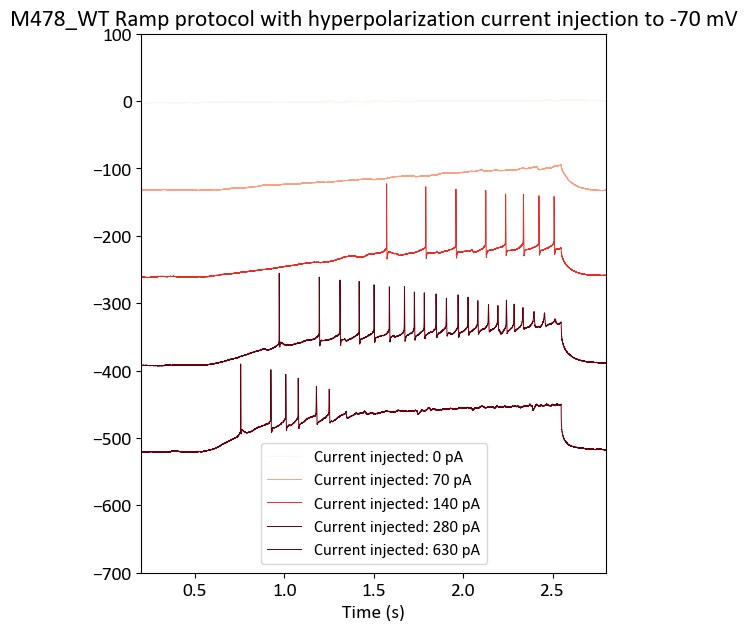

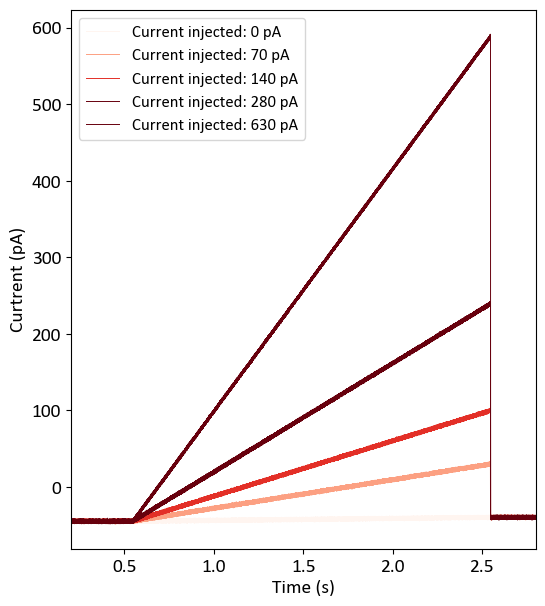

In [4]:
wt_ramp_path = r"""Z:\Omer\Ph.D\Project- Uri's sapap3ko_vs_wt_crh_cells\Data\DATA for analysis\WT\3.8.25\2025_08_03_0002.abf"""
abf = pyabf.ABF(wt_ramp_path)
colormap = 'Reds'  # You can change this to any colormap you prefer, e.g. 'viridis', 'plasma', 'Blues', 'Greens', 'magma', 'cividis', etc.
cmap = cm.get_cmap(colormap)
plt.figure(figsize = (6, 7))
plt.title("M478_WT Ramp protocol with hyperpolarization current injection to -70 mV")
sweeps_to_plot =[0,1,2,4,9]
for idx, sweep in enumerate(sweeps_to_plot):
    abf.setSweep(sweep,1,baseline=[0,0.1]) 
    plt.plot(abf.sweepX,abf.sweepY-(130*idx),label=f'Current injected: {(sweep)*70} pA',color=cmap(idx / (len(sweeps_to_plot)-2)),linewidth=0.7)
plt.legend(fontsize = 12)
plt.ylim(-700, 100)
plt.xlim(0.2, 2.8)
plt.xlabel("Time (s)")

plt.figure(figsize = (6, 7))
for idx, sweep in enumerate(sweeps_to_plot):
    abf.setSweep(sweep,2) 
    plt.plot(abf.sweepX,abf.sweepY,label=f'Current injected: {(sweep)*70} pA',color=cmap(idx / (len(sweeps_to_plot)-2)),linewidth=0.7)
plt.legend(fontsize = 12)
plt.xlabel("Time (s)")
plt.ylabel("Curtrent (pA)")
plt.xlim(0.2, 2.8)

C:\Users\omerich.WISMAIN\AppData\Local\Temp\ipykernel_18232\677839054.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(colormap)


(0.2, 2.8)

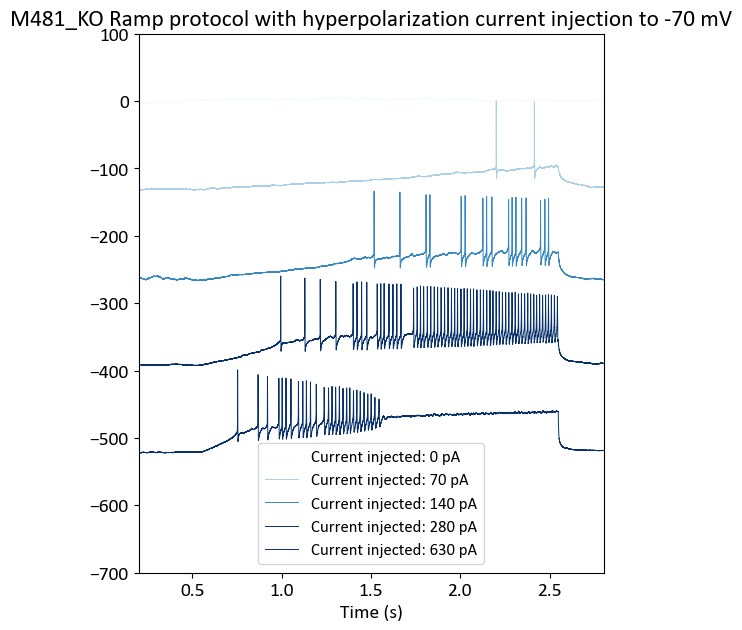

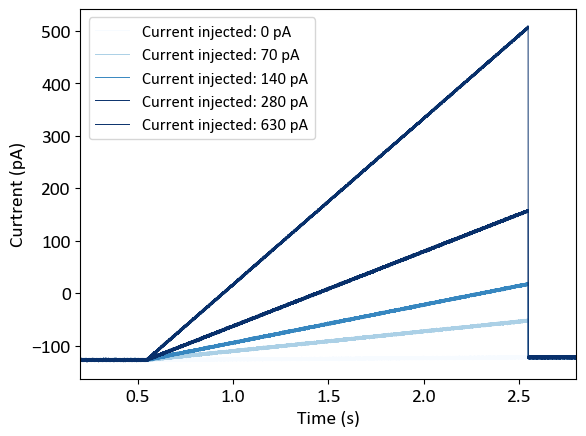

In [5]:
ko_ramp_path = r"""Z:\Omer\Ph.D\Project- Uri's sapap3ko_vs_wt_crh_cells\Data\DATA for analysis\KO\4.8.25\2025_08_04_0010.abf"""
abf = pyabf.ABF(ko_ramp_path)
colormap = 'Blues'  # You can change this to any colormap you prefer, e.g. 'viridis', 'plasma', 'Blues', 'Greens', 'magma', 'cividis', etc.
cmap = cm.get_cmap(colormap)
plt.figure(figsize=(6, 7))
plt.title("M481_KO Ramp protocol with hyperpolarization current injection to -70 mV")
sweeps_to_plot =[0,1,2,4,9]
for idx, sweep in enumerate(sweeps_to_plot):
    abf.setSweep(sweep,1,baseline=[0,0.1]) 
    plt.plot(abf.sweepX,abf.sweepY-(130*idx),label=f'Current injected: {(sweep)*70} pA',color=cmap(idx / (len(sweeps_to_plot)-2)),linewidth=0.7)
plt.legend(fontsize = 12)
plt.ylim(-700, 100)
plt.xlim(0.2, 2.8)
plt.xlabel("Time (s)")

plt.figure()
for idx, sweep in enumerate(sweeps_to_plot):
    abf.setSweep(sweep,2) 
    plt.plot(abf.sweepX,abf.sweepY,label=f'Current injected: {(sweep)*70} pA',color=cmap(idx / (len(sweeps_to_plot)-2)),linewidth=0.7)
plt.legend(fontsize=12)
plt.xlabel("Time (s)")
plt.ylabel("Curtrent (pA)")
plt.xlim(0.2, 2.8)

## ***IV protocol*** 
*The IV protocol contain 14 sweeps in CC with current steps of +50 pA, ranging from -200 pA and up to +500 pA.*  

*from the IV protocol, we will calculate the following parameters:*  
- ***Rin:*** *Input resistance, calculated as:* 
$$
\frac{\mathrm{V_{during-injection}} - \mathrm{V_{rest}}}{\text{Current injected (pA)}}
$$
- ***Vrest:*** *Resting membrane potential, calculated as the average of the baseline period before the current injection.*  

- ***Firing rate/current injection:*** *the firing rate (in Hz) is calculated as the number of action potentials   
during the current injection times 2, since the current injection last 0.5 seconds.* 

## ***Gap-free protocol***  
*The Gap-free protocol contain 1 sweep, 5 minutes long recording in VC  
The voltage is clamped to the neuron's membrane resting potential as being viwed at the I=0 recording.*  

- *From the Gap-free protocol I'm clacultating the distribution of events detected during the recording.*

## ***I=0 protocol***  
*The I=0 protocol conatin one sweep, 1 minute long (in I=0 mode)*
*From the I=0 protocol im calculating the PSD (Power spectral density), which tells  
 me which frequencies the signal is composed from and what is the power of those frequencies in units of mV**2/Hz*

## ***Ramp protocol***  
*The Ramp protocol contains 10 sweeps with 2 seconds ramp going every sweep from 0 to #sweepX70 pA  
(e.g, sweep 0 will contain 2 seconds ramp from 0 to 70 pA, sweep 5 will contain 2 sconds ramp from 0 to 350 pA. See "Ramp protocol exapmle" plot up this notebook)*

- *From the Ramp protocol I can calculate the "Rheo base", We should think if we are interested in calculating it, I believe that if we hold the cell on on CC down to -70 mV, the Rheo base will be an outcome of the input resistance. if we don't hold the cell, the Rheo base will be an outcome of the natural spiking rate of the cell, or, it will only reflect the resting potential of the cell.*

In [6]:
def main_processor(path):
    iv_file_size_in_kb = 4109
    ramp_file_size_in_kb = 8797
    i_0_file_size_in_kb = 4693
    gap_free_file_size_in_kb = 58600
    sweeps_in_iv_curve = 14
    sweeps_in_ramp_curve = 10  # Assuming there are 10 sweeps in the IV curve and ramp
    row_idx = -1
    df = pd.DataFrame(columns=['file_name', 'sweep_number', 'input_resistance', 'resting_potential',
                                'firing_rate_per_current_injection','frequencies','power', 'events_in_gap_free','protocol','rheo_base'])

    for folder in os.listdir(path):
        file_path = os.path.join(path, folder)
        for file in os.listdir(file_path):
            if file.endswith('.abf'):
                file_size = os.path.getsize(os.path.join(file_path, file)) / 1024
                abf = pyabf.ABF(os.path.join(file_path,file))
                row_idx += 1
                if iv_file_size_in_kb-2 <= file_size <= iv_file_size_in_kb+2:
                    for sweep in range(0,sweeps_in_iv_curve):
                        sweep_recording = iv_protocol(abf, sweep)
                        input_resistance = sweep_recording.calculate_input_resistance()
                        resting_potential = sweep_recording.calculate_resting_potential()
                        try:
                            firing_rate_for_current_input = sweep_recording.firing_rate_for_current_injection()
                        except:
                            firing_rate_for_current_input = 0

                        df.loc[row_idx] = {
                            'input_resistance': input_resistance,
                            'resting_potential': resting_potential,
                            'file_name': file,
                            'sweep_number': sweep,
                            'firing_rate_per_current_injection': firing_rate_for_current_input,
                            'frequencies': np.nan,
                            'power': np.nan,
                            'events_in_gap_free': np.nan,
                            'protocol': 'iv_protocol',
                            'rheo_base': np.nan}
                        row_idx += 1
                elif  ramp_file_size_in_kb-2 <=file_size <= ramp_file_size_in_kb+2:
                    for sweep in range(0,sweeps_in_ramp_curve):
                        ramp_recording = ramp_protocol(abf, sweep)
                        
                        try:
                            rheo_base = ramp_recording.calculate_rheo_base()
                            df.loc[row_idx] = {
                            'input_resistance': np.nan,
                            'resting_potential': np.nan,
                            'file_name': file,
                            'firing_rate_per_current_injection': np.nan,
                            'sweep_number': sweep,
                            'frequencies': np.nan,
                            'power': np.nan,
                            'events_in_gap_free': np.nan,
                            'protocol': 'ramp_protocol',
                            'rheo_base': rheo_base}
                            row_idx += 1
                            break
                            
                        except:
                            rheo_base = 0
                            df.loc[row_idx] = {
                            'input_resistance': np.nan,
                            'resting_potential': np.nan,
                            'file_name': file,
                            'firing_rate_per_current_injection': np.nan,
                            'sweep_number': sweep,
                            'frequencies': np.nan,
                            'power': np.nan,
                            'events_in_gap_free': np.nan,
                            'protocol': 'ramp_protocol',
                            'rheo_base': rheo_base}
                            row_idx += 1
                elif i_0_file_size_in_kb-2 <= file_size <= i_0_file_size_in_kb+2:
                    i_zero_recording = i_zero(abf)
                    frequencies,power = i_zero_recording.power_spectrum()
                    df.loc[row_idx] = {
                        'input_resistance': np.nan,
                        'resting_potential': np.nan,
                        'file_name': file,
                        'sweep_number': 0,
                        'firing_rate_per_current_injection': np.nan,
                        'frequencies': frequencies,
                        'power': power,
                        'events_in_gap_free': np.nan,
                        'protocol': 'i_zero',
                        'rheo_base': np.nan}
                elif gap_free_file_size_in_kb-2 <= file_size <= gap_free_file_size_in_kb+2:
                    gap_free_recording = gap_free_protocol(abf)
                    try:
                        events_tbl = gap_free_recording.events_in_gap_free()
                    except:
                        events_tbl = 0
                    df.loc[row_idx] = {
                        'input_resistance': np.nan,
                        'resting_potential': np.nan,
                        'file_name': file,
                        'sweep_number': 0,
                        'firing_rate_per_current_injection': np.nan,
                        'frequencies': 0,
                        'power': 0,
                        'events_in_gap_free': events_tbl,
                        'protocol': 'gap_free_protocol',
                        'rheo_base': np.nan}
                else:
                    print(f"File {file} does not match any known protocol size. Skipping.")
                    continue
    return df


class iv_protocol:
    def __init__(self,abf,sweep):
        self.abf = abf
        self.abf.setSweep(sweep,0)
        self.sweep = sweep
        self.protocol = "iv_protocol"
        self.current_injection_start_idx = 473*50
        self.current_injection_end_idx = self.current_injection_start_idx+25000
    def calculate_input_resistance(self):
        # Calculate input resistance based on the sweep data
        self.input_resistance = ((np.mean(self.abf.sweepY[30000:45000])-np.mean(self.abf.sweepY[5000:20000]))) / ((-200)+self.sweep*50) 
        return self.input_resistance
    def calculate_resting_potential(self):
        # Calculate resting potential based on the sweep data
        self.resting_potential = np.mean(self.abf.sweepY[0:20000])
        return self.resting_potential
    def firing_rate_for_current_injection(self):
        # Calculate firing rate for a given current injection
        self.abf.setSweep(self.sweep, 0, baseline=[0,0.1])
        self.sweepY = self.abf.sweepY
        tbl = peaks_finder(self.sweepY[self.current_injection_start_idx:self.current_injection_end_idx], 30, 120, 20, 50000, plot_it=False)
        self.firing_rate = len(tbl) * 2  # Count the number of peaks as firing rate - the answer is in Hz
        return self.firing_rate
    

class gap_free_protocol:
    def __init__(self,abf):
        self.abf = abf
        self.protocol = "gap_free_protocol" 
    def events_in_gap_free(self):
        # Find events in the gap-free protocol
        self.abf.setSweep(0,0, baseline=[0, 1])
        self.abf.sweepY = filtering_function(self.abf.sweepY)

        events_tbl = peaks_finder(self.abf.sweepY[50000:50000*240], 35, 120, 40, 50000, plot_it='DONT_plot_it')
        self.events_list = events_tbl['peak_amp']
        return self.events_list, self.protocol
    
class i_zero:
    def __init__(self,abf):
        self.abf = abf
        self.sweepX = abf.sweepX
        self.sweepY = abf.sweepY
        self.protocol = "i_zero"
    def power_spectrum(self):
        self.abf.setSweep(0,0, baseline=[0, 0.5])
        self.frequencies, self.power = welch(self.sweepY, fs=50000, nperseg=2048)
        return self.frequencies, self.power
    

class ramp_protocol:
    def __init__(self, abf,sweep):
        self.abf = abf
        self.recording_channel = 1
        self.stimulation_channel = 2
        self.sweep = sweep
        self.abf.setSweep(self.sweep,self.recording_channel,baseline=[0.1, 0.2])
        self.sweepX = abf.sweepX
        self.sweepY = abf.sweepY
        self.sample_rate = 50000
        self.current_injection_per_sweep = 70
        self.protocol = "ramp_protocol"
        self.current_injection_start_idx = 550*50
        self.current_injection_end_idx = self.current_injection_start_idx + 100000
    def calculate_rheo_base(self):
        current_injection_slope = (self.sweep*self.current_injection_per_sweep)/(self.sample_rate*2) # this is pA per sample
        self.abf.setSweep(self.sweep,self.recording_channel, baseline=[0.1,0.2])
        segment_to_analyze = self.sweepY[self.current_injection_start_idx:self.current_injection_end_idx]    
        tbl = peaks_finder(segment_to_analyze, 20, 120, 10, 50000, plot_it='DONT plot_it')
        event_index = tbl.loc[0,'peak_index']
        current_injected_at_that_point = event_index * current_injection_slope
        return current_injected_at_that_point

In [7]:
wt_df = main_processor(r"""Z:\Omer\Ph.D\Project- Uri's sapap3ko_vs_wt_crh_cells\Data\DATA for analysis\WT""")
ko_df = main_processor(r"""Z:\Omer\Ph.D\Project- Uri's sapap3ko_vs_wt_crh_cells\Data\DATA for analysis\KO""")

C:\Users\omerich.WISMAIN\AppData\Local\Temp\ipykernel_18232\2179966965.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  self.input_resistance = ((np.mean(self.abf.sweepY[30000:45000])-np.mean(self.abf.sweepY[5000:20000]))) / ((-200)+self.sweep*50)
C:\Users\omerich.WISMAIN\AppData\Local\Temp\ipykernel_18232\2179966965.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[row_idx] = {
C:\Users\omerich.WISMAIN\AppData\Local\Temp\ipykernel_18232\2179966965.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant en

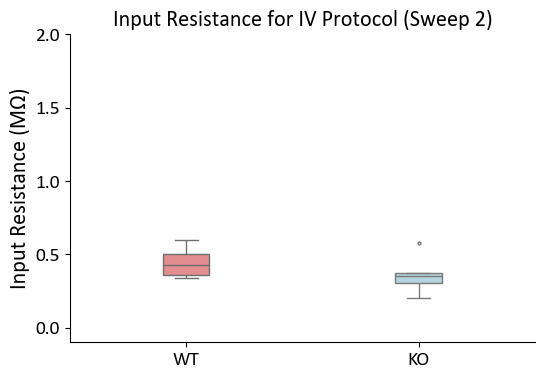

In [8]:
filtred_data_wt = wt_df[(wt_df['sweep_number'] == 2) & (wt_df['protocol'] == 'iv_protocol')]
filtred_data_ko = ko_df[(ko_df['sweep_number'] == 2) & (ko_df['protocol'] == 'iv_protocol')]
plt.figure(figsize=(6, 4))
sns.boxplot(x = 0,y=filtred_data_wt['input_resistance'].dropna(), color='lightcoral', width=0.2, linewidth=1, fliersize=2)
sns.boxplot(x = 1,y=filtred_data_ko['input_resistance'].dropna(), color='lightblue', width=0.2, linewidth=1, fliersize=2)
plt.ylabel('Input Resistance (MΩ)', fontsize=16)
plt.title('Input Resistance for IV Protocol (Sweep 2)', fontsize=16)
plt.xticks([0,1], ['WT','KO'])
sns.despine()
plt.ylim(-0.1, 2)
plt.show()

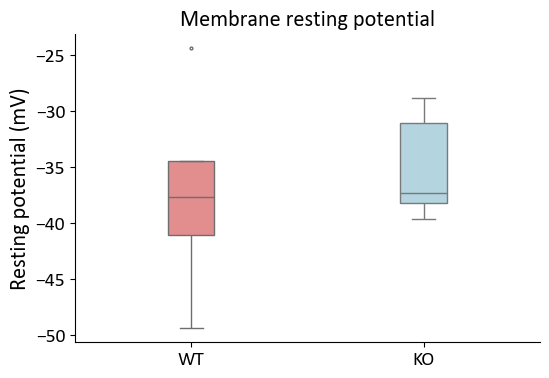

In [15]:
filtred_data_wt = wt_df[(wt_df['sweep_number'] == 2) & (wt_df['protocol'] == 'iv_protocol')]
filtred_data_ko = ko_df[(ko_df['sweep_number'] == 2) & (ko_df['protocol'] == 'iv_protocol')]
plt.figure(figsize=(6, 4))
sns.boxplot(x =0,y=filtred_data_wt['resting_potential'].dropna(), color='lightcoral', width=0.2, linewidth=1, fliersize=2)
sns.boxplot(x = 1,y=filtred_data_ko['resting_potential'].dropna(), color='lightblue', width=0.2, linewidth=1, fliersize=2)
plt.ylabel('Resting potential (mV)', fontsize=16)
plt.title('Membrane resting potential', fontsize=16)
plt.xticks([0,1], ['WT','KO'])
sns.despine()
plt.show()

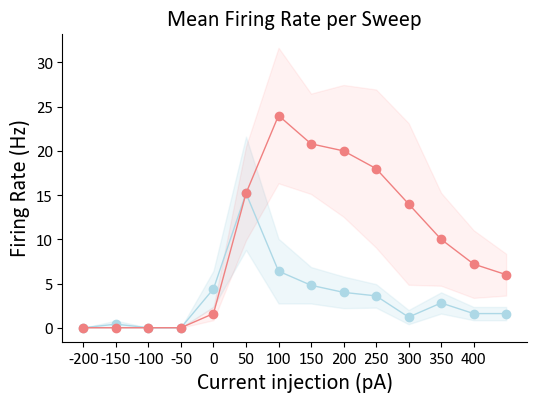

In [10]:
filtred_data_wt = wt_df[wt_df['protocol'] == 'iv_protocol']
filtred_data_ko = ko_df[ko_df['protocol'] == 'iv_protocol']

firing_rate_means_wt = []
firing_rate_sem_wt = []
firing_rate_means_ko = []
firing_rate_sem_ko = []

for sweep in filtred_data_wt['sweep_number'].unique():
    # Use a different variable name to avoid overwriting filtred_data
    sweep_data = filtred_data_wt[filtred_data_wt['sweep_number'] == sweep]  
    mean_firing_rate = sweep_data['firing_rate_per_current_injection'].dropna().mean()
    sem_firing_rate = sweep_data['firing_rate_per_current_injection'].dropna().std()
    firing_rate_means_wt.append(mean_firing_rate)
    firing_rate_sem_wt.append(sem_firing_rate/np.sqrt(len(sweep_data['firing_rate_per_current_injection'].dropna())))

for sweep in filtred_data_ko['sweep_number'].unique():
    # Use a different variable name to avoid overwriting filtred_data
    sweep_data = filtred_data_ko[filtred_data_ko['sweep_number'] == sweep]  
    mean_firing_rate = sweep_data['firing_rate_per_current_injection'].dropna().mean()
    sem_firing_rate = sweep_data['firing_rate_per_current_injection'].dropna().std()
    firing_rate_means_ko.append(mean_firing_rate)
    firing_rate_sem_ko.append(sem_firing_rate/np.sqrt(len(sweep_data['firing_rate_per_current_injection'].dropna())))

plt.figure(figsize=(6, 4))
plt.plot(firing_rate_means_ko, marker='o', color='lightblue', linewidth=1, label='Mean Firing Rate')
plt.fill_between(range(len(firing_rate_means_ko)),
                 np.array(firing_rate_means_ko) - np.array(firing_rate_sem_ko),
                 np.array(firing_rate_means_ko) + np.array(firing_rate_sem_ko),color = 'lightblue', alpha=0.2,)
plt.plot(firing_rate_means_wt, marker='o', color='lightcoral', linewidth=1, label='Mean Firing Rate')
plt.fill_between(range(len(firing_rate_means_wt)),
                 np.array(firing_rate_means_wt) - np.array(firing_rate_sem_wt),
                 np.array(firing_rate_means_wt) + np.array(firing_rate_sem_wt),color = 'red', alpha=0.05,)


plt.ylabel('Firing Rate (Hz)', fontsize=16)  # Fixed label to match what you're plotting
plt.xlabel('Current injection (pA)', fontsize=16)  # Added x-axis label
plt.title('Mean Firing Rate per Sweep', fontsize=16)
plt.xticks(np.arange(13),np.arange(-200,450,50),fontsize = 12)
plt.yticks(fontsize = 12)  # Fixed title to match what you're plotting
sns.despine()
plt.show()

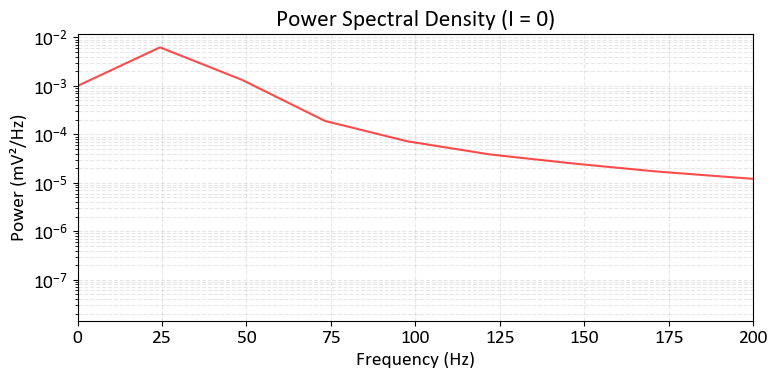

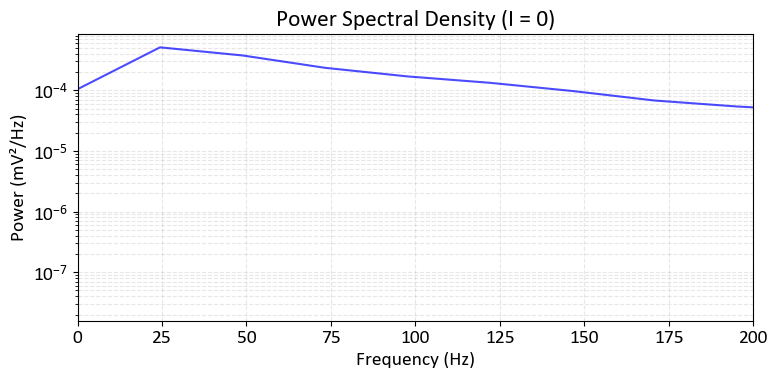

In [11]:
filtred_data_wt = wt_df[wt_df['protocol'] == 'i_zero']
row_for_plot = 4
plt.figure(figsize=(8, 4))
plt.semilogy(filtred_data_wt.iloc[row_for_plot]['frequencies'], filtred_data_wt.iloc[row_for_plot]['power'], color="red",alpha = 0.7, linewidth=1.5)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (mV²/Hz)")
plt.title("Power Spectral Density (I = 0)")
plt.xlim(0, 200)  # Optional: focus on 0–200 Hz
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

filtred_data_ko = ko_df[ko_df['protocol'] == 'i_zero']
row_for_plot = 3
plt.figure(figsize=(8, 4))
plt.semilogy(filtred_data_ko.iloc[row_for_plot]['frequencies'], filtred_data_ko.iloc[row_for_plot]['power'], color="blue",alpha = 0.7, linewidth=1.5)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (mV²/Hz)")
plt.title("Power Spectral Density (I = 0)")
plt.xlim(0, 200)  # Optional: focus on 0–200 Hz
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

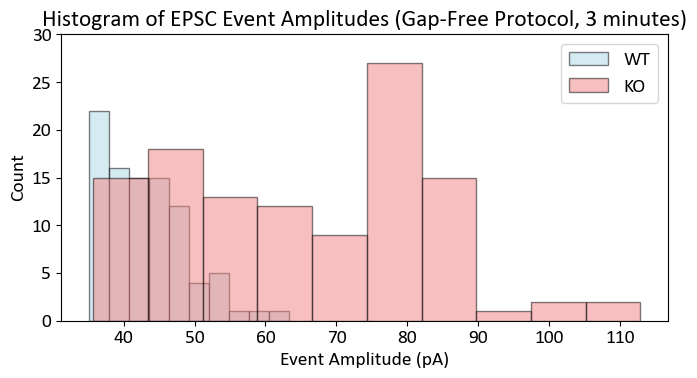

In [12]:
gap_free_df_wt = wt_df[wt_df['protocol'] == 'gap_free_protocol']
gap_free_column_wt = gap_free_df_wt['events_in_gap_free'].dropna().tolist()
# Clean and flatten the list
all_event_amplitudes_wt = []

for item in gap_free_column_wt:
    if isinstance(item, tuple) and isinstance(item[0], pd.Series):
        all_event_amplitudes_wt.extend(item[0].dropna().tolist())
    elif isinstance(item, pd.Series):  # just in case some are raw Series
        all_event_amplitudes_wt.extend(item.dropna().tolist())
    # Skip anything else (e.g., 0)

# Convert to numpy array for safety
all_event_amplitudes_wt = np.array(all_event_amplitudes_wt)

gap_free_df_ko = ko_df[ko_df['protocol'] == 'gap_free_protocol']
gap_free_column_ko = gap_free_df_ko['events_in_gap_free'].dropna().tolist()
# Clean and flatten the list
all_event_amplitudes_ko = []

for item in gap_free_column_ko:
    if isinstance(item, tuple) and isinstance(item[0], pd.Series):
        all_event_amplitudes_ko.extend(item[0].dropna().tolist())
    elif isinstance(item, pd.Series):  # just in case some are raw Series
        all_event_amplitudes_ko.extend(item.dropna().tolist())
    # Skip anything else (e.g., 0)

# Convert to numpy array for safety
all_event_amplitudes_ko = np.array(all_event_amplitudes_ko)
plt.figure(figsize=(7, 4))
plt.hist(all_event_amplitudes_wt, bins=10, color="lightblue", edgecolor="black", alpha=0.5, label="WT")
plt.hist(all_event_amplitudes_ko, bins=10, color="lightcoral", edgecolor="black", alpha=0.5, label="KO")
plt.legend()
plt.ylim(0,30)
plt.xlabel("Event Amplitude (pA)")
plt.ylabel("Count")
plt.title("Histogram of EPSC Event Amplitudes (Gap-Free Protocol, 3 minutes)")
plt.tight_layout()
plt.show()

